In [ ]:
# by 건우
# 22/01/05

# 두개의 모델의 성능을 같이 시각화하는 구현을 mnist(필기체)로 구현하고 시각화된 결과를 첨부하세요 ~~

# 실험 제목 : " 층이 깊어지면 오버피팅이 더 발생하는가 ? "

# 첫번째 모델 : 3층 신경망
# 두번째 모델 : 4층 신경망



In [1]:
# ■ 두개의 모델을 생성하기 위한 공통 코드 부분

# 1. 데이터를 불러옵니다.
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data(path = 'mnist.npz')

# 2. 정규화를 합니다.
x_train = x_train / 255
x_test = x_test / 255


# 3. 정답 데이터를 구성합니다.
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)     # 원핫 인코딩
y_test = to_categorical(y_test)       # 원핫 인코딩
print(y_test.shape)           # (10000,10)

# 4. 훈련 데이터를 훈련데이터와 검정 데이터로 나눕니다.

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split( x_train, y_train, test_size = 0.3, random_state = 777 )



11501568/11490434 [==============================] - 0s 0us/step
(10000, 10)


In [2]:
# ▩ 첫번째 모델 구성하기 ( 3층 신경망 )

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model1 = Sequential()
model1.add( Flatten( input_shape = (28,28) ) )    # (28.28)    ----> (1, 28*28) 로 변환하는 코드, 0층
model1.add( Dense(64, activation = 'relu') )      # 64개의 뉴런을 가지는 은닉1층
model1.add( Dense(32, activation = 'relu') )      # 32개의 뉴런을 가지는 은닉2층
model1.add( Dense(10, activation = 'softmax') )      # 10개의 뉴런을 가지는 출력층 ( 3층 )


In [3]:
# ▩ 첫번째 모델에 대한 학습과정을 설정하고 학습시키기

model1.compile( optimizer = 'adam',           # 옵티마이저 : adam
 loss = 'categorical_crossentropy',       # 오차함수 다중분류이므로 categorical_crossentropy
metrics = ['acc'] )       # 모니터링할 평가지표 : 정확도

model1_history = model1.fit( x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val) ) 

# 설명 : model1_history 에 훈련 데이터의 정확도 값과 오차값과 검증 데이터의 정확도값과 오차값이 쌓임


Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4897 - acc: 0.8607 - val_loss: 0.2598 - val_acc: 0.9269
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2204 - acc: 0.9355 - val_loss: 0.2015 - val_acc: 0.9413
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1671 - acc: 0.9511 - val_loss: 0.1673 - val_acc: 0.9507
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1386 - acc: 0.9596 - val_loss: 0.1559 - val_acc: 0.9548
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1181 - acc: 0.9656 - val_loss: 0.1394 - val_acc: 0.9586
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1015 - acc: 0.9701 - val_loss: 0.1324 - val_acc: 0.9604
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0894 - acc: 0.9735 - val_loss: 0.1238 - val_acc: 0.9621
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

In [4]:
# ▩ 두번째 모델 구성하기 ( 4층 신경망 )


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model2 = Sequential()
model2.add( Flatten( input_shape = (28,28) ) )    # (28.28)    ----> (1, 28*28) 로 변환하는 코드, 0층
model2.add( Dense(128, activation = 'relu') )      # 128개의 뉴런을 가지는 은닉1층
model2.add( Dense(64, activation = 'relu') )      # 64개의 뉴런을 가지는 은닉2층
model2.add( Dense(32, activation = 'relu') )      # 32개의 뉴런을 가지는 은닉3층
model2.add( Dense(10, activation = 'softmax') )      # 10개의 뉴런을 가지는 출력층 ( 4층 )


In [5]:
# ▩ 두번째 모델의 학습과정을 설정하고 학습 시키기

model2.compile( optimizer = 'adam',           # 옵티마이저 : adam
 loss = 'categorical_crossentropy',       # 오차함수 다중분류이므로 categorical_crossentropy
metrics = ['acc'] )       # 모니터링할 평가지표 : 정확도

model2_history = model2.fit( x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val) ) 


Epoch 1/30
329/329 [==============================] - 2s 6ms/step - loss: 0.4129 - acc: 0.8816 - val_loss: 0.1919 - val_acc: 0.9450
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1621 - acc: 0.9527 - val_loss: 0.1615 - val_acc: 0.9548
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1177 - acc: 0.9647 - val_loss: 0.1269 - val_acc: 0.9634
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.0899 - acc: 0.9730 - val_loss: 0.1136 - val_acc: 0.9657
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.0714 - acc: 0.9787 - val_loss: 0.1073 - val_acc: 0.9682
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.0602 - acc: 0.9815 - val_loss: 0.1090 - val_acc: 0.9671
Epoch 7/30
329/329 [==============================] - 2s 6ms/step - loss: 0.0445 - acc: 0.9865 - val_loss: 0.0946 - val_acc: 0.9729
Epoch 8/30
329/329 [==============================] - 2s 5ms/step - loss: 0.

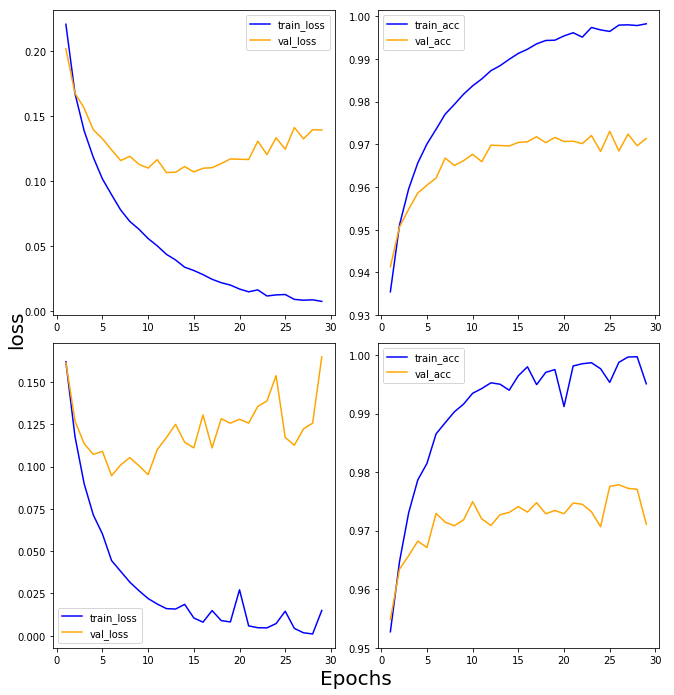

In [6]:
# ▩ 두개의 모델의 학습과정을 같이 시각화 하시오 !


import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc( model1_history, model2_history, 30)


In [ ]:
# loss 는 두 모델다 0.00에 가깝고, 정확도 또한 두 모델다 1.00에 가깝게 나왔다.
# 하지만 4층 신경망인 두번째 모델이 과대적합 문제에 적게 노출되었다.